In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy
import scipy
import math
import matplotlib
import matplotlib.dates as mpd
import pylab as plt
import datetime as dtm
import pytz
import multiprocessing as mpp
import pickle
import sys
import os
#import lmod
# lmod.load('system')
# lmod.load('texlive')
# lmod.
#
# TODO: phase out unreferenced hpc_lib calls...
import hpc_lib
import hpc_reports
#
# def running_mean(X,n=10):
#     return (numpy.cumsum(numpy.insert(X,0,0))[n:] - numpy.cumsum(numpy.insert(X,0,0))[:-n])/n
# #

In [3]:
n_cpus = 4
print('** epoch: {}'.format(mpd.get_epoch()))
n_cpus = int(os.environ.get('SLURM_CPUS_PER_TASK',4))


** epoch: 1970-01-01T00:00:00


In [4]:
N_report_len = 180
end_dtm = dtm.datetime(2022,7,6)
end_date = end_dtm.date()
start_date = end_date - dtm.timedelta(days=N_report_len)
print('*** dates: {} - {}'.format(start_date, end_date))
partition='serc'
#partition=None
group=None
s_user=None
verbose=0
# group='oneillm'
# group='edunham'
#s_user = 'labraha2'
#
sacct_h5_file = f'sacct_data/sacct_p{str(partition).upper()}_g{str(group).upper()}_u{s_user}_{start_date.year:04}{start_date.month:02}{start_date.day:02}_{end_dtm.year:04}{end_dtm.month:02}{end_dtm.day:02}.h5'
print(f'*** sacct_h5_file: {sacct_h5_file}')
# NOTE: to get individual users, eg to get Eric's group usage:
#. sacct --allusers --user=labraha2 --start=2022-01-01 --end=2022-06-15
#
print(f'isFile({sacct_h5_file}): {os.path.isfile(sacct_h5_file)}')

*** dates: 2022-01-07 - 2022-07-06
*** sacct_h5_file: sacct_data/sacct_pSERC_gNONE_uNone_20220107_20220706.h5
isFile(sacct_data/sacct_pSERC_gNONE_uNone_20220107_20220706.h5): True


In [5]:
# NOTE: additional options can be passed in the more_options=[] arrary, or just as sacct_{option-name}={val}
#
if os.path.isfile(sacct_h5_file):
    print('*** Creating SACCT object from HDF5 {}'.format(sacct_h5_file))
    SACCT_obj = hpc_lib.SACCT_data_from_h5(sacct_h5_file, keep_raw_data=False, n_cpu=n_cpus)
    #
    
else:
    print('*** Fetching SACCT data directly')
    SACCT_obj = hpc_lib.SACCT_data_direct(group=group, partition=partition, start_date=str(start_date),
                                          n_cpu=n_cpus, verbose=verbose,
                                          end_date=str(end_date), keep_raw_data=False)
    # , sacct_user=s_user
    print(f'** writing HDF5: {sacct_h5_file}')
    SACCT_obj.write_hdf5(sacct_h5_file)
    #
#

*** Creating SACCT object from HDF5 sacct_data/sacct_pSERC_gNONE_uNone_20220107_20220706.h5


In [6]:
print('** ', SACCT_obj.jobs_summary.dtype.names)
print('\n** ', SACCT_obj.jobs_summary.dtype)
print('\n** ', SACCT_obj.n_cpu, type(SACCT_obj.n_cpu))

**  ('index', 'User', 'Group', 'GID', 'JobName', 'JobID', 'JobIDRaw', 'Partition', 'State', 'Timelimit', 'NCPUS', 'NNodes', 'Submit', 'Eligible', 'Start', 'End', 'Elapsed', 'SystemCPU', 'UserCPU', 'TotalCPU', 'NTasks', 'CPUTimeRAW', 'Suspended', 'ReqTRES', 'AllocTRES', 'MaxRSS', 'AveRSS', 'AveVMSize', 'MaxVMSize', 'MaxDiskWrite', 'MaxDiskRead', 'AveDiskWrite', 'AveDiskRead', 'JobID_parent', 'NGPUs')

**  [('index', '<i8'), ('User', 'S8'), ('Group', 'S8'), ('GID', 'S6'), ('JobName', 'S81'), ('JobID', 'S67'), ('JobIDRaw', 'S8'), ('Partition', 'S4'), ('State', 'S19'), ('Timelimit', '<f8'), ('NCPUS', '<i8'), ('NNodes', '<i8'), ('Submit', '<f8'), ('Eligible', '<f8'), ('Start', '<f8'), ('End', '<f8'), ('Elapsed', '<f8'), ('SystemCPU', '<f8'), ('UserCPU', '<f8'), ('TotalCPU', '<f8'), ('NTasks', '<f8'), ('CPUTimeRAW', 'S9'), ('Suspended', 'S8'), ('ReqTRES', 'S49'), ('AllocTRES', 'S61'), ('MaxRSS', '<f8'), ('AveRSS', '<f8'), ('AveVMSize', '<f8'), ('MaxVMSize', '<f8'), ('MaxDiskWrite', '<f8'), (

In [7]:

print('** ', SACCT_obj.jobs_summary.dtype)
print('** ', type(SACCT_obj.jobs_summary['User'][0]))
#
my_ary = numpy.array(len(SACCT_obj.jobs_summary), dtype=SACCT_obj.jobs_summary.dtype)
print('** ', my_ary.dtype)
#
for cl,tp in SACCT_obj.jobs_summary.dtype.descr:
    print('** ', cl, tp)
    

print('** ** ', SACCT_obj.jobs_summary['Group'].astype(str)[0])


**  [('index', '<i8'), ('User', 'S8'), ('Group', 'S8'), ('GID', 'S6'), ('JobName', 'S81'), ('JobID', 'S67'), ('JobIDRaw', 'S8'), ('Partition', 'S4'), ('State', 'S19'), ('Timelimit', '<f8'), ('NCPUS', '<i8'), ('NNodes', '<i8'), ('Submit', '<f8'), ('Eligible', '<f8'), ('Start', '<f8'), ('End', '<f8'), ('Elapsed', '<f8'), ('SystemCPU', '<f8'), ('UserCPU', '<f8'), ('TotalCPU', '<f8'), ('NTasks', '<f8'), ('CPUTimeRAW', 'S9'), ('Suspended', 'S8'), ('ReqTRES', 'S49'), ('AllocTRES', 'S61'), ('MaxRSS', '<f8'), ('AveRSS', '<f8'), ('AveVMSize', '<f8'), ('MaxVMSize', '<f8'), ('MaxDiskWrite', '<f8'), ('MaxDiskRead', '<f8'), ('AveDiskWrite', '<f8'), ('AveDiskRead', '<f8'), ('JobID_parent', 'S67'), ('NGPUs', '<i8')]
**  <class 'numpy.bytes_'>
**  [('index', '<i8'), ('User', 'S8'), ('Group', 'S8'), ('GID', 'S6'), ('JobName', 'S81'), ('JobID', 'S67'), ('JobIDRaw', 'S8'), ('Partition', 'S4'), ('State', 'S19'), ('Timelimit', '<f8'), ('NCPUS', '<i8'), ('NNodes', '<i8'), ('Submit', '<f8'), ('Eligible', '<f

**  [6.52947800e+09 6.53311300e+09 6.53386000e+09 6.80350550e+10
 1.50968000e+08 3.54979965e+11 4.59378640e+10 4.99879460e+10
 4.16474490e+10 7.18013300e+10]
*** quantiles:  [4.393000e-03 6.545402e+00 7.112037e+00 7.290473e+00]


TypeError: zeros() missing required argument 'shape' (pos 1)

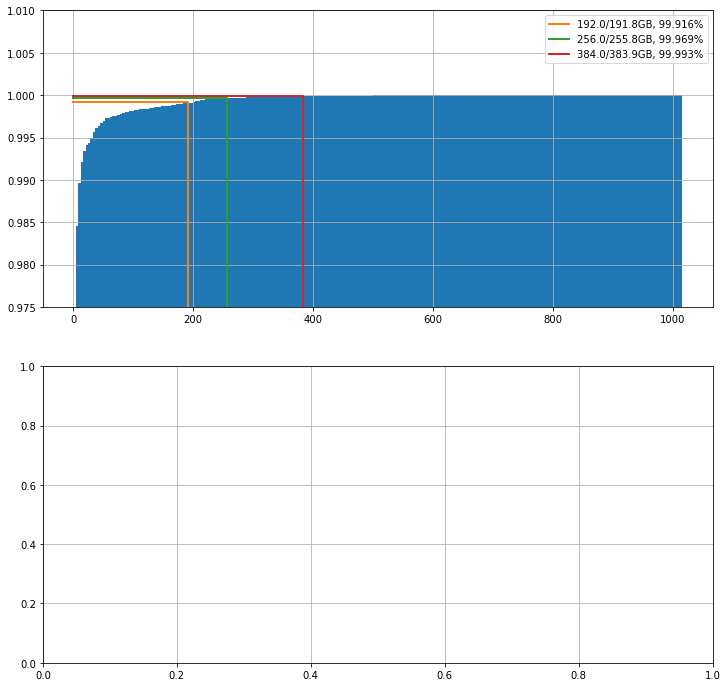

In [8]:
print('** ', SACCT_obj.jobs_summary['MaxRSS'][0:10])
fg = plt.figure(figsize=(12,12))
ax1 = fg.add_subplot(2,1,1)
ax2 = fg.add_subplot(2,1,2)
ax1.grid()
ax2.grid()
#
ix = numpy.invert(numpy.isnan(SACCT_obj.jobs_summary['MaxRSS']))
X  = SACCT_obj.jobs_summary['MaxRSS'][ix]
X /= float(1E9)
X.sort()
RSS_qs = numpy.quantile(X, [.1, .5, .75, .9])
print('*** quantiles: ', RSS_qs)
#
# note: we don't really do anything with these x_n bits...
x_250 = numpy.searchsorted(sorted(X), 256)
x_384 = numpy.searchsorted(sorted(X), 384)
#
hh = ax1.hist(X[X>RSS_qs[0]], bins=250,  cumulative=True, density=True)
#ax1.set_xlim(RSS_qs[1],1.1*numpy.nanmax(SACCT_obj.jobs_summary['MaxRSS']))
#
N = len(X)
for m in [192., 256., 384.]:
    k = numpy.searchsorted(X,m)-1
    p = k/N
    x = X[k]
    #
    ax1.plot([x,x,0.], [0., p, p ], ls='-', lw=2., label=f'{m}/{x:.1f}GB, {100.*p:.3f}%')
#
ax1.set_ylim(.975, 1.01)
ax1.legend(loc=0)

#
prev = numpy.zeros()
for m in (384., 255.):
    ix_255 = SACCT_obj.jobs_summary['MaxRSS']>=(m*1E9)
    activity_bigmem = SACCT_obj.active_jobs_cpu(jobs_summary=SACCT_obj.jobs_summary[ix_255])
    x = activity_bigmem['time']
    ax2.plot(x, activity_bigmem['N_cpu'], ls='-', lw=2., label=f'M>{m}')
ax2.plot(x[::len(x)-1], numpy.ones(2)*8*128, ls='--')
ax2.legend(loc=0)

In [ ]:
activity_bigmem.dtype.names

*** quantiles:  [0.252464  7.7541    8.233026  8.9905944]


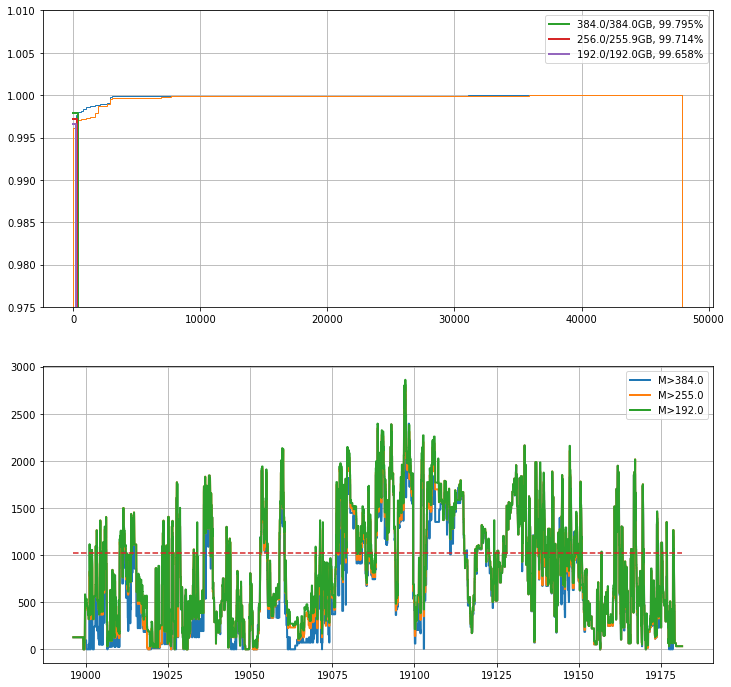

In [9]:
fg = plt.figure(figsize=(12,12))
ax1 = fg.add_subplot(2,1,1)
ax2 = fg.add_subplot(2,1,2)
ax1.grid()
ax2.grid()
#
col = 'MaxVMSize'
ix = numpy.invert(numpy.isnan(SACCT_obj.jobs_summary[col]))
X  = SACCT_obj.jobs_summary[col][ix]
X0 = X.copy()/1E9
X /= SACCT_obj.jobs_summary['NNodes'][ix]
X /= float(1E9)
X.sort()
RSS_qs = numpy.quantile(X, [.1, .5, .75, .9])
RSS0_qs = numpy.quantile(X0, [.1, .5, .75, .9])
print('*** quantiles: ', RSS_qs)
#
# note: we don't really do anything with these x_n bits...

hh = ax1.hist(X[X>RSS_qs[0]], bins=250, histtype='step',  cumulative=True, density=True)
hh = ax1.hist(X0[X0>RSS0_qs[0]], bins=250, histtype='step',  cumulative=True, density=True)
#ax1.set_xlim(RSS_qs[1],1.1*numpy.nanmax(SACCT_obj.jobs_summary['MaxRSS']))
#
N = len(X)
for m in [192., 256., 384.][::-1]:
    k = numpy.searchsorted(X,m)-1
    p = k/N
    x = X[k]
    #
    ax1.plot([x,x,0.], [0., p, p ], ls='-', lw=2., label=f'{m}/{x:.1f}GB, {100.*p:.3f}%')
#
ax1.set_ylim(.975, 1.01)
#ax1.set_xlim(-100.,10000.)
ax1.legend(loc=0)
#
for m in ( 384., 255., 192.):
    ix_255 = SACCT_obj.jobs_summary[col]>=(m*1E9)
    activity_bigmem = SACCT_obj.active_jobs_cpu(jobs_summary=SACCT_obj.jobs_summary[ix_255])
    x = activity_bigmem['time']
    ax2.plot(x, activity_bigmem['N_cpu'], ls='-', lw=2., label=f'M>{m}')
ax2.plot(x[::len(x)-1], numpy.ones(2)*8*128, ls='--')
ax2.legend(loc=0)

In [32]:
# IO Activity:
#
# date_range_to_timeseries(t_start=0, t_end=None, x_val=None, t0=0., dt=.1)
k=10
rw = SACCT_obj[k]
print('** rw: ', rw)
print('** **: ', rw['Start'], rw['End'])
print('** dtype: ', rw.dtype.names)
print('** ** DEBUG: ', rw['Start'], rw['End'], rw['MaxRSS'])
x = hpc_lib.date_range_to_timeseries(t_start=rw['Start'], t_end=rw['End'], x_val=rw['MaxRSS'])
print('** x[{}]:\n'.format(len(x)))
for xx in x:
    print('* ', xx)
print('** ** DEBUG: ', rw['Start'], rw['End'], rw['MaxRSS'])

** rw:  (34, b'ysp', b'beroza', b'18036', b'exp1_tr3', b'41880779_1', b'41880780', b'serc', b'TIMEOUT', 2., 32, 1, 18997.20391204, 18997.20392361, 18997.20511574, 18999.2053588, 2.00016204, 2.34953704e-06, 1.04166667e-07, 2.4537037e-06, 1., b'5530048', b'00:00:00', b'billing=77,cpu=32,gres/gpu=1,mem=120G,node=1', b'billing=77,cpu=32,gres/gpu=1,mem=120G,node=1', 5.3034356e+10, 5.3034356e+10, 7.0557968e+10, 7.0557968e+10, 2.313354e+10, 1.3288923e+11, 2.313354e+10, 1.3288923e+11, b'41880779_1', 1)
** **:  18997.20511574074 18999.205358796295
** dtype:  ('index', 'User', 'Group', 'GID', 'JobName', 'JobID', 'JobIDRaw', 'Partition', 'State', 'Timelimit', 'NCPUS', 'NNodes', 'Submit', 'Eligible', 'Start', 'End', 'Elapsed', 'SystemCPU', 'UserCPU', 'TotalCPU', 'NTasks', 'CPUTimeRAW', 'Suspended', 'ReqTRES', 'AllocTRES', 'MaxRSS', 'AveRSS', 'AveVMSize', 'MaxVMSize', 'MaxDiskWrite', 'MaxDiskRead', 'AveDiskWrite', 'AveDiskRead', 'JobID_parent', 'NGPUs')
** ** DEBUG:  18997.20511574074 18999.2053587

In [51]:
print(x.shape)

(21, 2)


**  18993.8 19181.600000000002
**  2022-01-01 19:12:00+00:00 2022-07-08 14:24:00+00:00


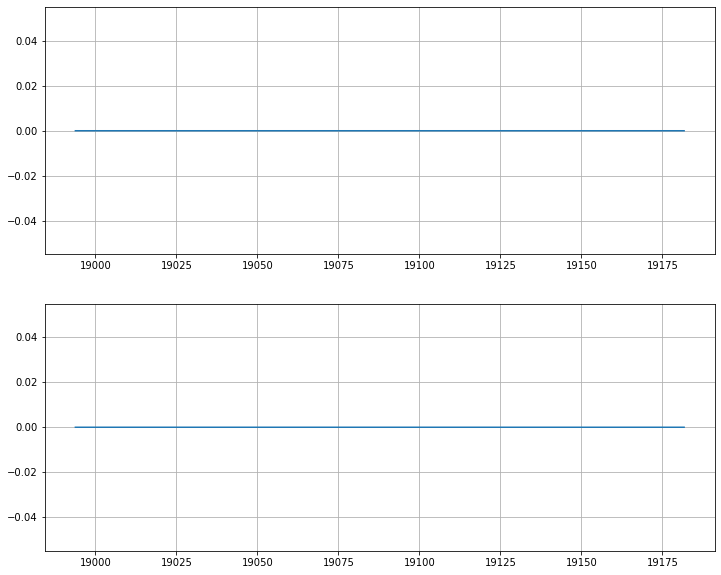

In [67]:
# example of constructing a TS from ranges, in this case of RSS.
#
dt_hr = .1
#
ts_min = dt_hr*numpy.floor(numpy.min(SACCT_obj['Start'])/dt_hr)
ts_max = dt_hr*numpy.ceil(numpy.max([numpy.max([SACCT_obj['Start'],
                                                SACCT_obj['End']]), mpd.date2num(end_dtm)])/dt_hr)
#
print('** ', ts_min, ts_max)
print('** ', mpd.num2date(ts_min), mpd.num2date(ts_max))
#
#dt_hr = 1./24.

T = numpy.arange(ts_min, ts_max+dt_hr, dt_hr)
RSS_ave = numpy.zeros(len(T))
RSS_max = numpy.zeros(len(T))
#RSS = numpy.array([T, *numpy.zeros( (2,len(T))).astype(float)]).T

fg = plt.figure(figsize=(12,10))
ax1 = fg.add_subplot(2,1,1)
ax2 = fg.add_subplot(2,1,2)
#
ax1.plot(T, RSS_ave, ls='-', label='AveRSS')
ax2.plot(T, RSS_max, ls='-', label='MaxRSS')
#
ax1.grid()
ax2.grid()

In [ ]:
for rw in SACCT_obj[['Start', 'End', 'AveRSS', 'MaxRSS']]:
    ts_ones = hpc_lib.date_range_to_timeseries(t_start=rw['Start'], t_end=rw['End'], dt=dt_hr, x_val=1.0)
    #k = numpy.searchsorted(RSS[:,0], ts_ones[0])
    #k = numpy.searchsorted(RSS[:,0], rw['Start'])
    k = numpy.searchsorted(T, rw['Start'])
    #
    #ts_mx = hpc_lib.date_range_to_timeseries(t_start=rw['Start'], t_end=rw['End'], dt=dt_hr, x_val=rw['MaxRSS'])
    #tx_av = ts_ones * rw['AveRSS']
    #tx_mx =
    #
    #RSS[k:k+len(ts_ones):1] += rw['AveRSS']
    #RSS[k:k+len(ts_ones):2] += rw['MaxRSS']
    RSS_ave[k:k+len(ts_ones)] += (0. or rw['AveRSS'])*ts_ones[:,1]
    RSS_max[k:k+len(ts_ones)] += (0. or rw['MaxRSS'])*ts_ones[:,1]
    #
#

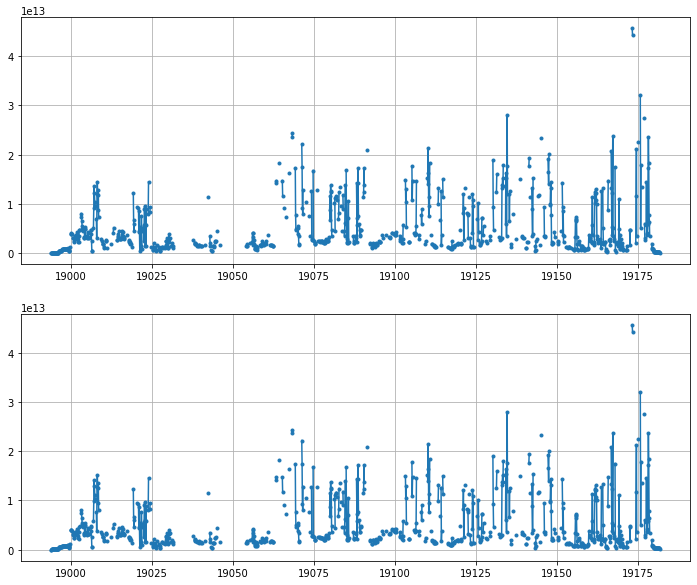

In [70]:
fg = plt.figure(figsize=(12,10))
ax1 = fg.add_subplot(2,1,1)
ax2 = fg.add_subplot(2,1,2)
#
ax1.plot(T, RSS_ave, ls='-', marker='.', label='AveRSS')
ax2.plot(T, RSS_max, ls='-', marker='.', label='MaxRSS')
#
ax1.grid()
ax2.grid()
    

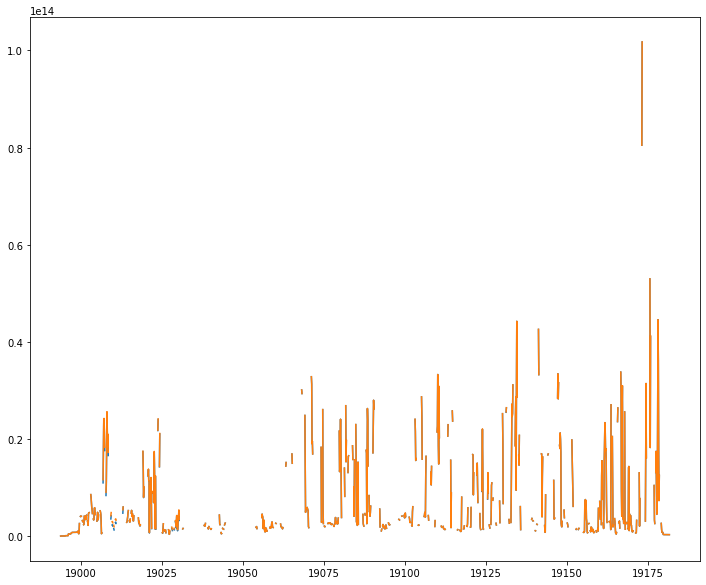

In [71]:
waits = SACCT_obj.get_wait_stats(qs=[.5, .75, .9])

In [72]:
waits.dtype

dtype((numpy.record, [('ncpus', '>i8'), ('mean', '>f8'), ('median', '>f8'), ('stdev', '>f8'), ('min', '>f8'), ('max', '>f8'), ('q1', '>f8'), ('q2', '>f8'), ('q3', '>f8')]))

In [73]:
len(waits)

1194232

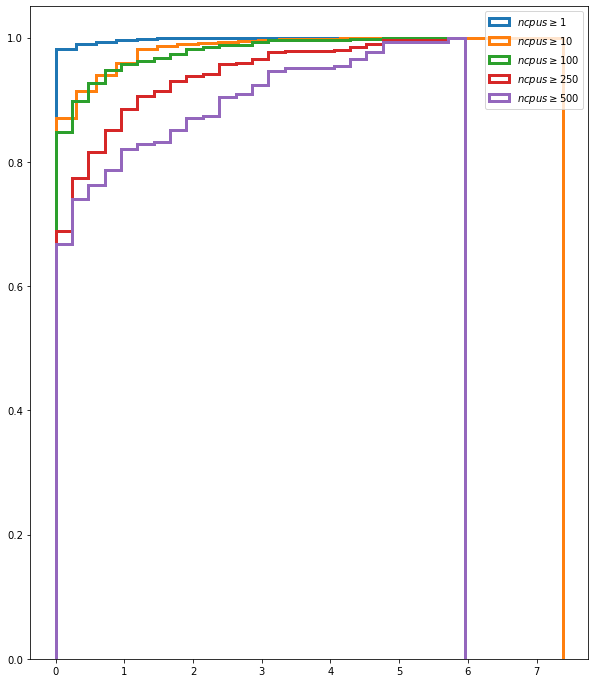

In [91]:
fg = plt.figure(figsize=(10,12))
ax = fg.add_subplot(1,1,1)
#
ns = [1, 10, 100, 250, 500,10000]
for n in [1, 10, 100, 250, 500]:
#for n1, n2 in zip(ns[:-1], ns[1:])
    ix = SACCT_obj['NCPUS']>=n
    #ix = numpy.logical_and()
    hh = ax.hist(SACCT_obj['Start'][ix]-SACCT_obj['Submit'][ix], bins=25,
                 histtype='step', cumulative=True, lw=3, density=True, label=f'$ncpus \geq {n}$' )
ax.legend(loc=0)
    #ax.set_ylim(1e6,1.25e6)
# max(1,int(numpy.sum(ix)/25)